# Check MWDC position resolutions
Input parquet file should be the output of `mwdc_processor.py` output without --output-wire-data option. <br>
All the shifts parameters needs to be adjusted before checking this notebook.

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

#spark = SparkSession.builder.getOrCreate()
spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("test/run1011_mwdc.parquet")
df.show(5)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/13 23:25:30 WARN Utils: Your hostname, gpuana02, resolves to a loopback address: 127.0.1.1; using 192.168.1.216 instead (on interface enp4s0)
26/01/13 23:25:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
26/01/13 23:25:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/13 23:25:31 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
26/01/13 23:25:31 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
26/01/13 23:25:31 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


+---------+----------+-----------+---------------+---------------+-----------+-----------+---------------+---------------+-----------+-----------+---------------+---------------+----------+-----------+---------------+---------------+----------+-----------+---------------+---------------+-----------+-----------+---------------+---------------+----------+-----------+---------------+---------------+----------+-----------+---------------+---------------+----------+-----------+---------------+---------------+----------+-----------+---------------+---------------+----------+-----------+---------------+---------------+----------+-----------+---------------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+-------------------+--------------------+-------------------+-------+
|hbfNumber|dc31_x1_dl|dc31_x1_id0|dc31_x1_charge0|dc31_x1_timing0| dc31_x2_dl|dc3

## Plot x-y images for each plane

[('dc31_x1_posi', 'dc31_y1_posi'), ('dc31_x2_posi', 'dc31_y2_posi'), ('dc31_x3_posi', 'dc31_y3_posi'), ('dc31_x4_posi', 'dc31_y4_posi'), ('dc32_x1_posi', 'dc32_y1_posi'), ('dc32_x2_posi', 'dc32_y2_posi')]
Statistics:
[[0.0000e+00 3.0000e+00 0.0000e+00]
 [0.0000e+00 8.3663e+04 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 8.381e+04 0.000e+00]
 [0.000e+00 7.000e+00 0.000e+00]]
Statistics:
[[0.0000e+00 1.0000e+00 0.0000e+00]
 [0.0000e+00 8.3728e+04 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [3.0000e+00 8.3779e+04 0.0000e+00]
 [0.0000e+00 8.0000e+00 0.0000e+00]]
Statistics:
[[0.000e+00 7.000e+00 0.000e+00]
 [0.000e+00 8.218e+04 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00]]
Statistics:
[[0.000e+00 0.000e+00 0.000e+00]
 [4.000e+00 8.313e+04 0.000e+00]
 [0.000e+00 1.400e+01 0.000e+00]]


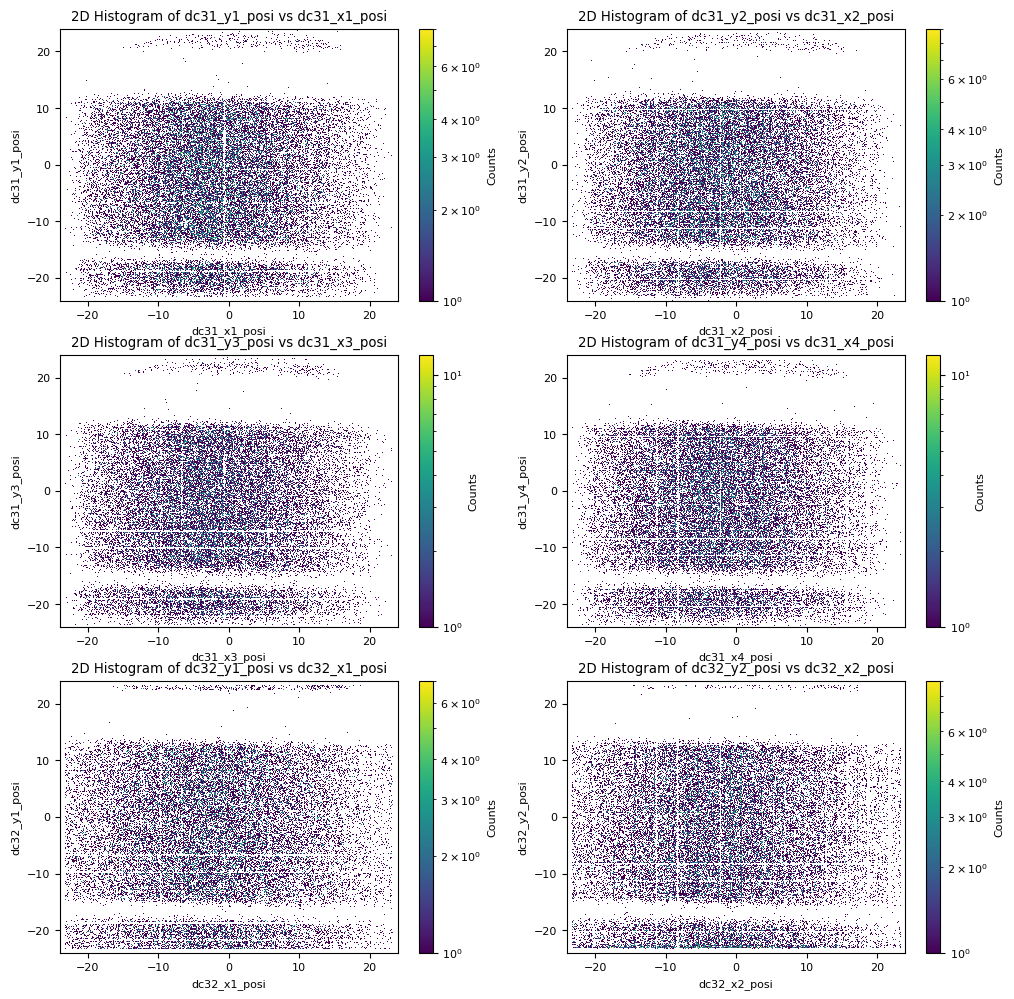

In [ ]:
from matplotlib import pyplot as plt
from hist.sparkHist2d import Hist2D
from matplotlib.colors import LogNorm


planes = [(f"dc31_x{x}_posi", f"dc31_y{x}_posi") for x in range(1,5)]
planes = planes + [(f"dc32_x{x}_posi", f"dc32_y{x}_posi") for x in range(1,3)]
print(planes)
plt.figure(0, figsize=(12,12))
plt.rcParams["font.size"] = 8
for i, plane in enumerate(planes):
    q, mod = divmod(i,2)
    plt.subplot2grid((3,2),(q,mod))
    d = Hist2D(df, [plane[0],plane[1]],[500,500],[[-24,24],[-24,24]],  interpolation='none', norm=LogNorm())
plt.show()

## DC31 position resolution
= errors on `dc31_x_posi` and `dc31_y_posi` in sigma

Number of events: 84203
Total entries: 83714, Underflow: 137, Inside: 83415, Overflow: 162
Total entries: 83747, Underflow: 170, Inside: 83441, Overflow: 136
Total entries: 83748, Underflow: 171, Inside: 83436, Overflow: 141
Total entries: 83728, Underflow: 151, Inside: 83445, Overflow: 132


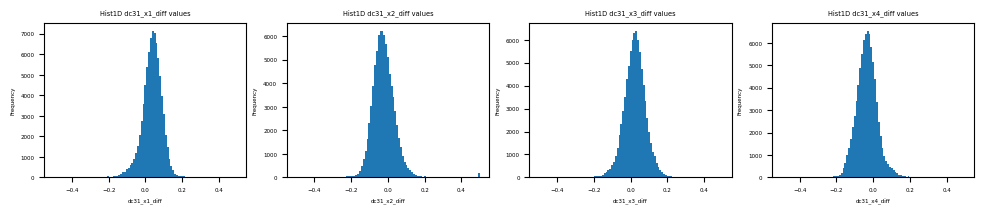

[0.07100958956814479, 0.06803330770307216, 0.06981932301783116, 0.07157525072653537]
DC31 x-plane resolution: 30.4 um
Total entries: 83461, Underflow: 116, Inside: 83213, Overflow: 132
Total entries: 83465, Underflow: 120, Inside: 83196, Overflow: 149
Total entries: 83471, Underflow: 126, Inside: 83233, Overflow: 112
Total entries: 83472, Underflow: 127, Inside: 83233, Overflow: 112


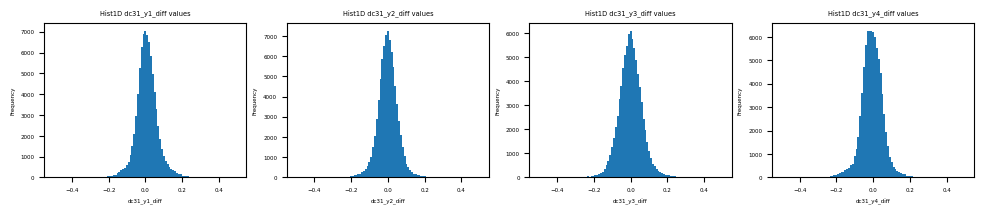

[0.06372565118817082, 0.0618924229923438, 0.06743675441232685, 0.06258346692789969]
DC31 y-plane resolution: 27.7 um


In [29]:
import math

from hist.sparkHist1d import Hist1D
planes = ["x", "y"]

n = df.count()
print(f"Number of events: {n}")
for plane in planes:
    dc31_planes = [f"dc31_{plane}{x}" for x in range(1,5)]

    df_avg = df.withColumn(f"dc31_{plane}_avg", sum(F.col(x+"_posi") for x in dc31_planes)/len(dc31_planes))
    stdevs = []
    plt.figure(0, figsize=(12,2))
    plt.rcParams["font.size"] = 4
    for i, pl in enumerate(dc31_planes):
        df_std = df_avg.withColumn(f"{pl}_diff", F.col(f"{pl}_posi") - F.col(f"dc31_{plane}_avg"))
        plt.subplot2grid((1,4),(0,i))
        h = Hist1D(df_std, f"{pl}_diff", 100, [-0.5, 0.5])
        df_std = df_std.filter(f"ABS({pl}_diff) < 0.8")
        df_std = df_std.withColumn(f"{pl}_resol", F.col(f"{pl}_diff")*F.col(f"{pl}_diff"))
        stdevs.append(df_std.select(F.sum(f"{pl}_resol")).collect()[0][0]/n)
    plt.show()
    print([math.sqrt(x) for x in stdevs])
    npl = float(len(stdevs))
    rms = math.sqrt(sum(stdevs)/npl*(npl-1))/npl
    print(f"DC31 {plane}-plane resolution: {rms*1000:.1f} um")


## DC32 Position Resolution
= errors on `dc32_x_posi` and `dc32_y_posi` in sigma

Number of events: 84203
Total entries: 85638, Underflow: 2341, Inside: 83219, Overflow: 78
Total entries: 83375, Underflow: 78, Inside: 80956, Overflow: 2341


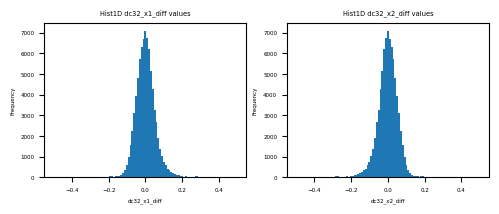

[0.06087498635346865, 0.06087498635346865]
DC32 x-plane resolution: 30.4 um
Total entries: 82080, Underflow: 87, Inside: 81921, Overflow: 72
Total entries: 82065, Underflow: 72, Inside: 81906, Overflow: 87


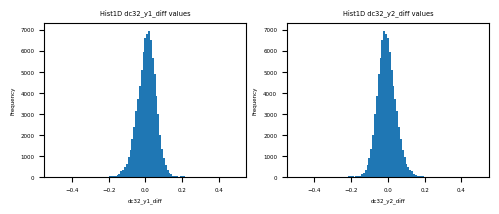

[0.05982571652389026, 0.05982571652389026]
DC32 y-plane resolution: 29.9 um


In [28]:
planes = ["x", "y"]

n = df.count()
print(f"Number of events: {n}")
for plane in planes:
    dc32_planes = [f"dc32_{plane}{x}" for x in range(1,3)]

    df_avg = df.withColumn(f"dc32_{plane}_avg", sum(F.col(x+"_posi") for x in dc32_planes)/len(dc32_planes))
    stdevs = []
    plt.figure(0, figsize=(12,2))
    plt.rcParams["font.size"] = 4
    for i, pl in enumerate(dc32_planes):
        df_std = df_avg.withColumn(f"{pl}_diff", F.col(f"{pl}_posi") - F.col(f"dc32_{plane}_avg"))
        plt.subplot2grid((1,4),(0,i))
        h = Hist1D(df_std, f"{pl}_diff", 100, [-0.5, 0.5])
        df_std = df_std.filter(f"ABS({pl}_diff) < 0.8")
        df_std = df_std.withColumn(f"{pl}_resol", F.col(f"{pl}_diff")*F.col(f"{pl}_diff"))
        stdevs.append(df_std.select(F.sum(f"{pl}_resol")).collect()[0][0]/n)
    plt.show()
    print([math.sqrt(x) for x in stdevs])
    npl = len(stdevs)
    rms = math.sqrt(sum(stdevs)/npl*(npl-1))/npl
    print(f"DC32 {plane}-plane resolution: {rms*1000:.1f} um")